### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd

import matplotlib.pyplot as plt

import plotting as plotting

### TODO: update this path

In [3]:
root = "/Users/michaelmoret/tinyverse/krap/data/24-11-25-bis-bis/single/"

### From here; automatic run

In [4]:
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)

20241126$25^DAN_IHNY_SDS_PYS_phos$single.txt
20241126$25^DAN_IHNY_SDS_PYS_0.01$single.txt
20241126$25^DAN_IHNY_SDS_PYS_0.03$single.txt


In [5]:
savepath = f"{root}plots/"
os.makedirs(savepath, exist_ok=True)

In [6]:
all_dfs = []
for file in os.listdir(root):
    if file.endswith(".txt"):
        print(file)
        df = pd.read_csv(root + file, 
                         sep="\t", 
                         header=None)

        # clean the df
        if "single" in file:
            df = plotting.clean_single(df)
        elif "triple" in root:
            df = plotting.clean_triple(df)
        else:
            raise ValueError("Unknown type of experiment")

        splitted_name = file.split("$")
        # get the experiments; i.e. not the date
        # not the single or triple
        splitted_name = splitted_name[1:-1]
        # add the experiment name in the dataframe
        all_names = []
        for entries in splitted_name:
            times_name = entries.split("^")
            _times = int(times_name[0])
            _name = times_name[1]
            all_names += [_name] * _times
        df["Name"] = all_names
        # remove nan
        df = df.dropna()
        all_dfs.append(df)
        
# merge df
df_merged = pd.concat(all_dfs)
df_merged.head(5)

20241126$25^DAN_IHNY_SDS_PYS_phos$single.txt
20241126$25^DAN_IHNY_SDS_PYS_0.01$single.txt
20241126$25^DAN_IHNY_SDS_PYS_0.03$single.txt


,RECORD,MEAN AREA,ESTIMATED_LENGTH(*),GRADIENT(*),EMOD(*)(#),EMOD,DECRIMPING_WORK,EXTENSION_WORK,START_X(*),START_Y,END_X(*),END_Y,ANALYSIS_WORK,BREAK_STRAIN(*)(#),BREAK_LOAD,TENSILE_STRENGTH,Name
0,1.0,4542.1,30.44,0.7591,5.087000e+09,5.087,0.000000e+00,0.010610,0.2628,20.20,0.8870,51.51,0.000031,51.216,0.9585,211.0,DAN_IHNY_SDS_PYS_phos
1,2.0,4985.1,30.13,0.8031,4.854000e+09,4.854,7.481000e-07,0.008765,0.2655,11.32,0.8297,39.16,0.000021,45.669,0.8167,163.8,DAN_IHNY_SDS_PYS_phos
2,3.0,4069.4,30.40,0.6542,4.887000e+09,4.887,0.000000e+00,0.009953,0.2303,19.41,0.8224,48.34,0.000025,55.822,0.8236,202.4,DAN_IHNY_SDS_PYS_phos
3,4.0,3869.6,30.32,0.6129,4.802000e+09,4.802,1.153000e-07,0.008244,0.2639,19.14,0.8245,46.52,0.000022,52.968,0.6917,178.7,DAN_IHNY_SDS_PYS_phos
4,5.0,3232.3,30.32,0.5755,5.398000e+09,5.398,0.000000e+00,0.006735,0.2639,23.52,0.8575,55.24,0.000023,49.703,0.6034,186.7,DAN_IHNY_SDS_PYS_phos


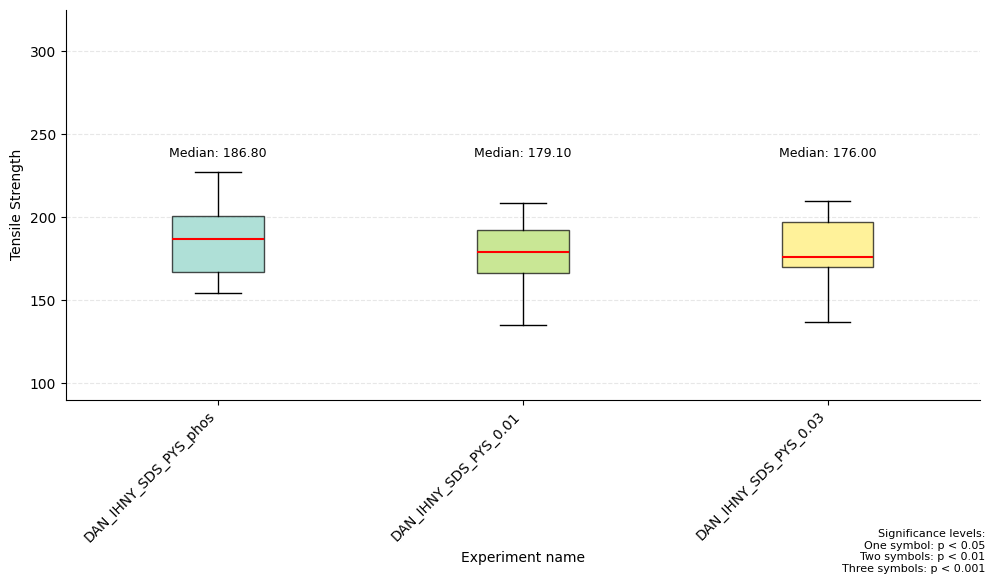

In [7]:
header = 'TENSILE_STRENGTH'
ymin = 90
ymax = 325
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Control check

In [8]:
unique_names = df_merged['Name'].unique()
for name in unique_names:
    median_tensile_strength = df_merged[df_merged['Name'] == name]['TENSILE_STRENGTH'].median()
    print(f"Median TENSILE_STRENGTH for {name}: {median_tensile_strength}")


Median TENSILE_STRENGTH for DAN_IHNY_SDS_PYS_phos: 186.8
Median TENSILE_STRENGTH for DAN_IHNY_SDS_PYS_0.01: 179.1
Median TENSILE_STRENGTH for DAN_IHNY_SDS_PYS_0.03: 176.0


In [9]:
len(df_merged)

71

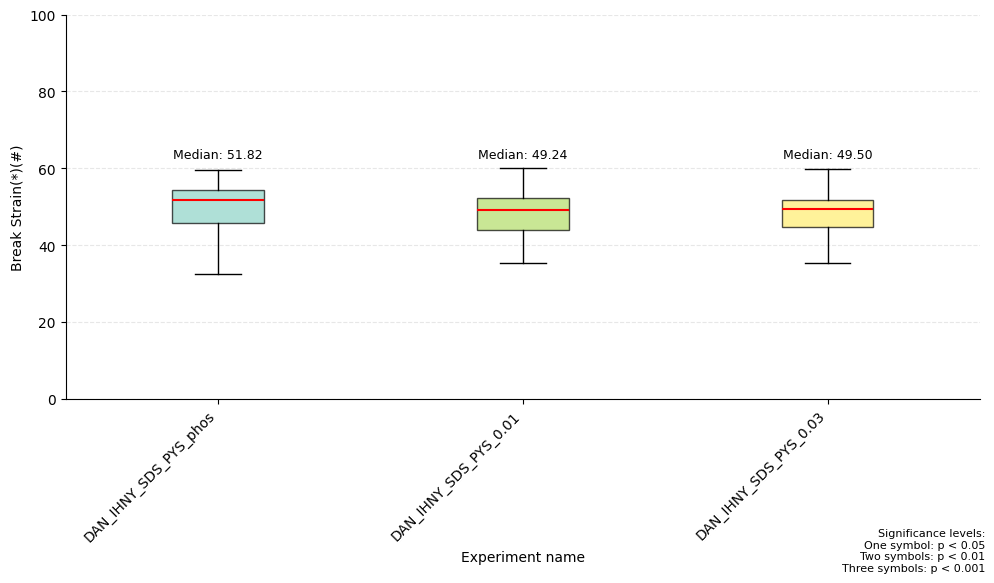

In [10]:
header = 'BREAK_STRAIN(*)(#)'
ymin = 0
ymax = 100
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()

Statistical significance between DAN_IHNY_SDS_PYS_phos and DAN_IHNY_SDS_PYS_0.01: p = 0.0000


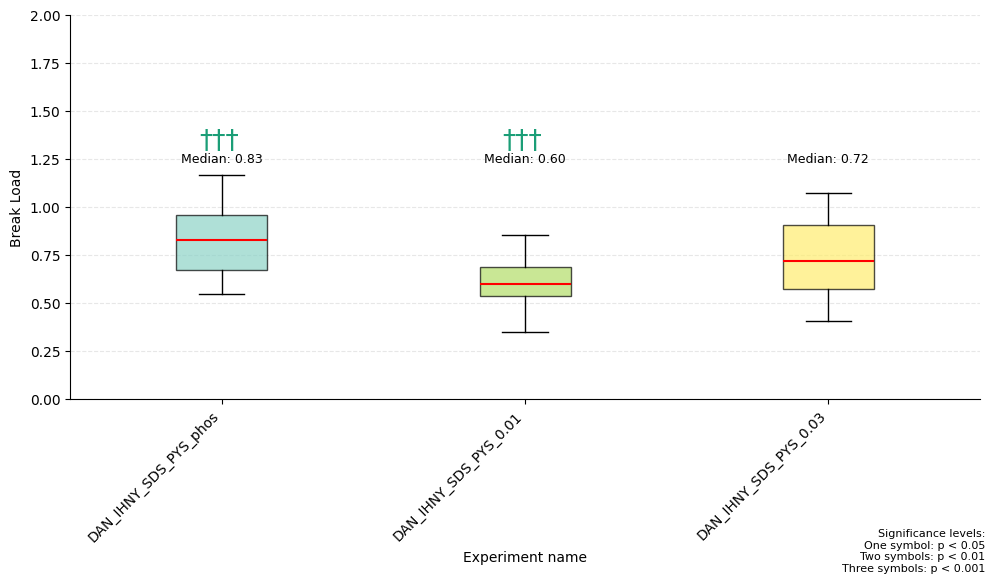

In [11]:
header = 'BREAK_LOAD'
ymin = 0
ymax = 2.0
fig, ax = plotting.create_boxplot(df_merged, header, ymin, ymax)
fig.savefig(f"{savepath}{header}.png")
plt.show()